In [ ]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
file_name = 'dataR2.csv'
def download_file(file_name):
    print('Descargando el dataset')
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'
    urllib.request.urlretrieve(url, file_name)
download_file(file_name)

Descargando el dataset


In [ ]:
data = pd.read_csv(file_name)
y = data["Classification"]
X = data.drop(["Classification"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     stratify=y,
                                     test_size=0.33,
                                     random_state=11)

In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB
None
              Age         BMI  ...        MCP.1  Classification
count  116.000000  116.000000  ...   116.000000      116.000000
mean    57.301724   27.582111  ...   534.647000        1.551724
std     16.112766    5.020136  ...   345.912663        0.499475
min     24.000000   18.370000  ...    45.843

In [ ]:
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)
print(f"Tree Accuracy: {tree.score(X_test, y_test)}")

Tree Accuracy: 0.6410256410256411


In [ ]:
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"RF Accuracy: {model.score(X_test, y_test)}")

RF Accuracy: 0.6923076923076923


In [ ]:
# cargar librerias-----------------------------------------------
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# crear objeto de la clase BaggingClassifier---------------------
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), n_estimators = 500,
    max_samples = 50, bootstrap=True, random_state = 3);

# ajustar el modelo----------------------------------------------
bag_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred = bag_clf.predict(X_test)

# comprobar resultados-------------------------------------------
from sklearn.metrics import accuracy_score
print('Bagging',accuracy_score(y_test, y_pred))


Bagging 0.6666666666666666


In [ ]:
# crear objeto de la clase BaggingClassifier---------------------
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), n_estimators = 500,
    max_samples = 50, bootstrap=False, random_state = 3);

# ajustar el modelo----------------------------------------------
pas_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_pas = pas_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print('Pasting',accuracy_score(y_test, y_pred_pas))

Pasting 0.6410256410256411


In [ ]:
# cargar librerias-----------------------------------------------
from sklearn.ensemble import RandomForestClassifier

# crear objeto de la clase RandomForestClassifier----------------
rnd_clf = RandomForestClassifier(n_estimators = 500, 
max_leaf_nodes = 4, random_state = 3, max_samples = 60);

# ajustar el modelo----------------------------------------------
rnd_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_rf = rnd_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print('RandomForest',accuracy_score(y_test, y_pred_rf))

RandomForest 0.8205128205128205


In [ ]:
# cargar librerias-----------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
# crear objeto de la clase BaggingClassifier---------------------
gb_clf = GradientBoostingClassifier(n_estimators = 500,
random_state = 3);

# ajustar el modelo----------------------------------------------
gb_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_gb = gb_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print('Gradient',accuracy_score(y_test, y_pred_gb))

Gradient 0.6410256410256411


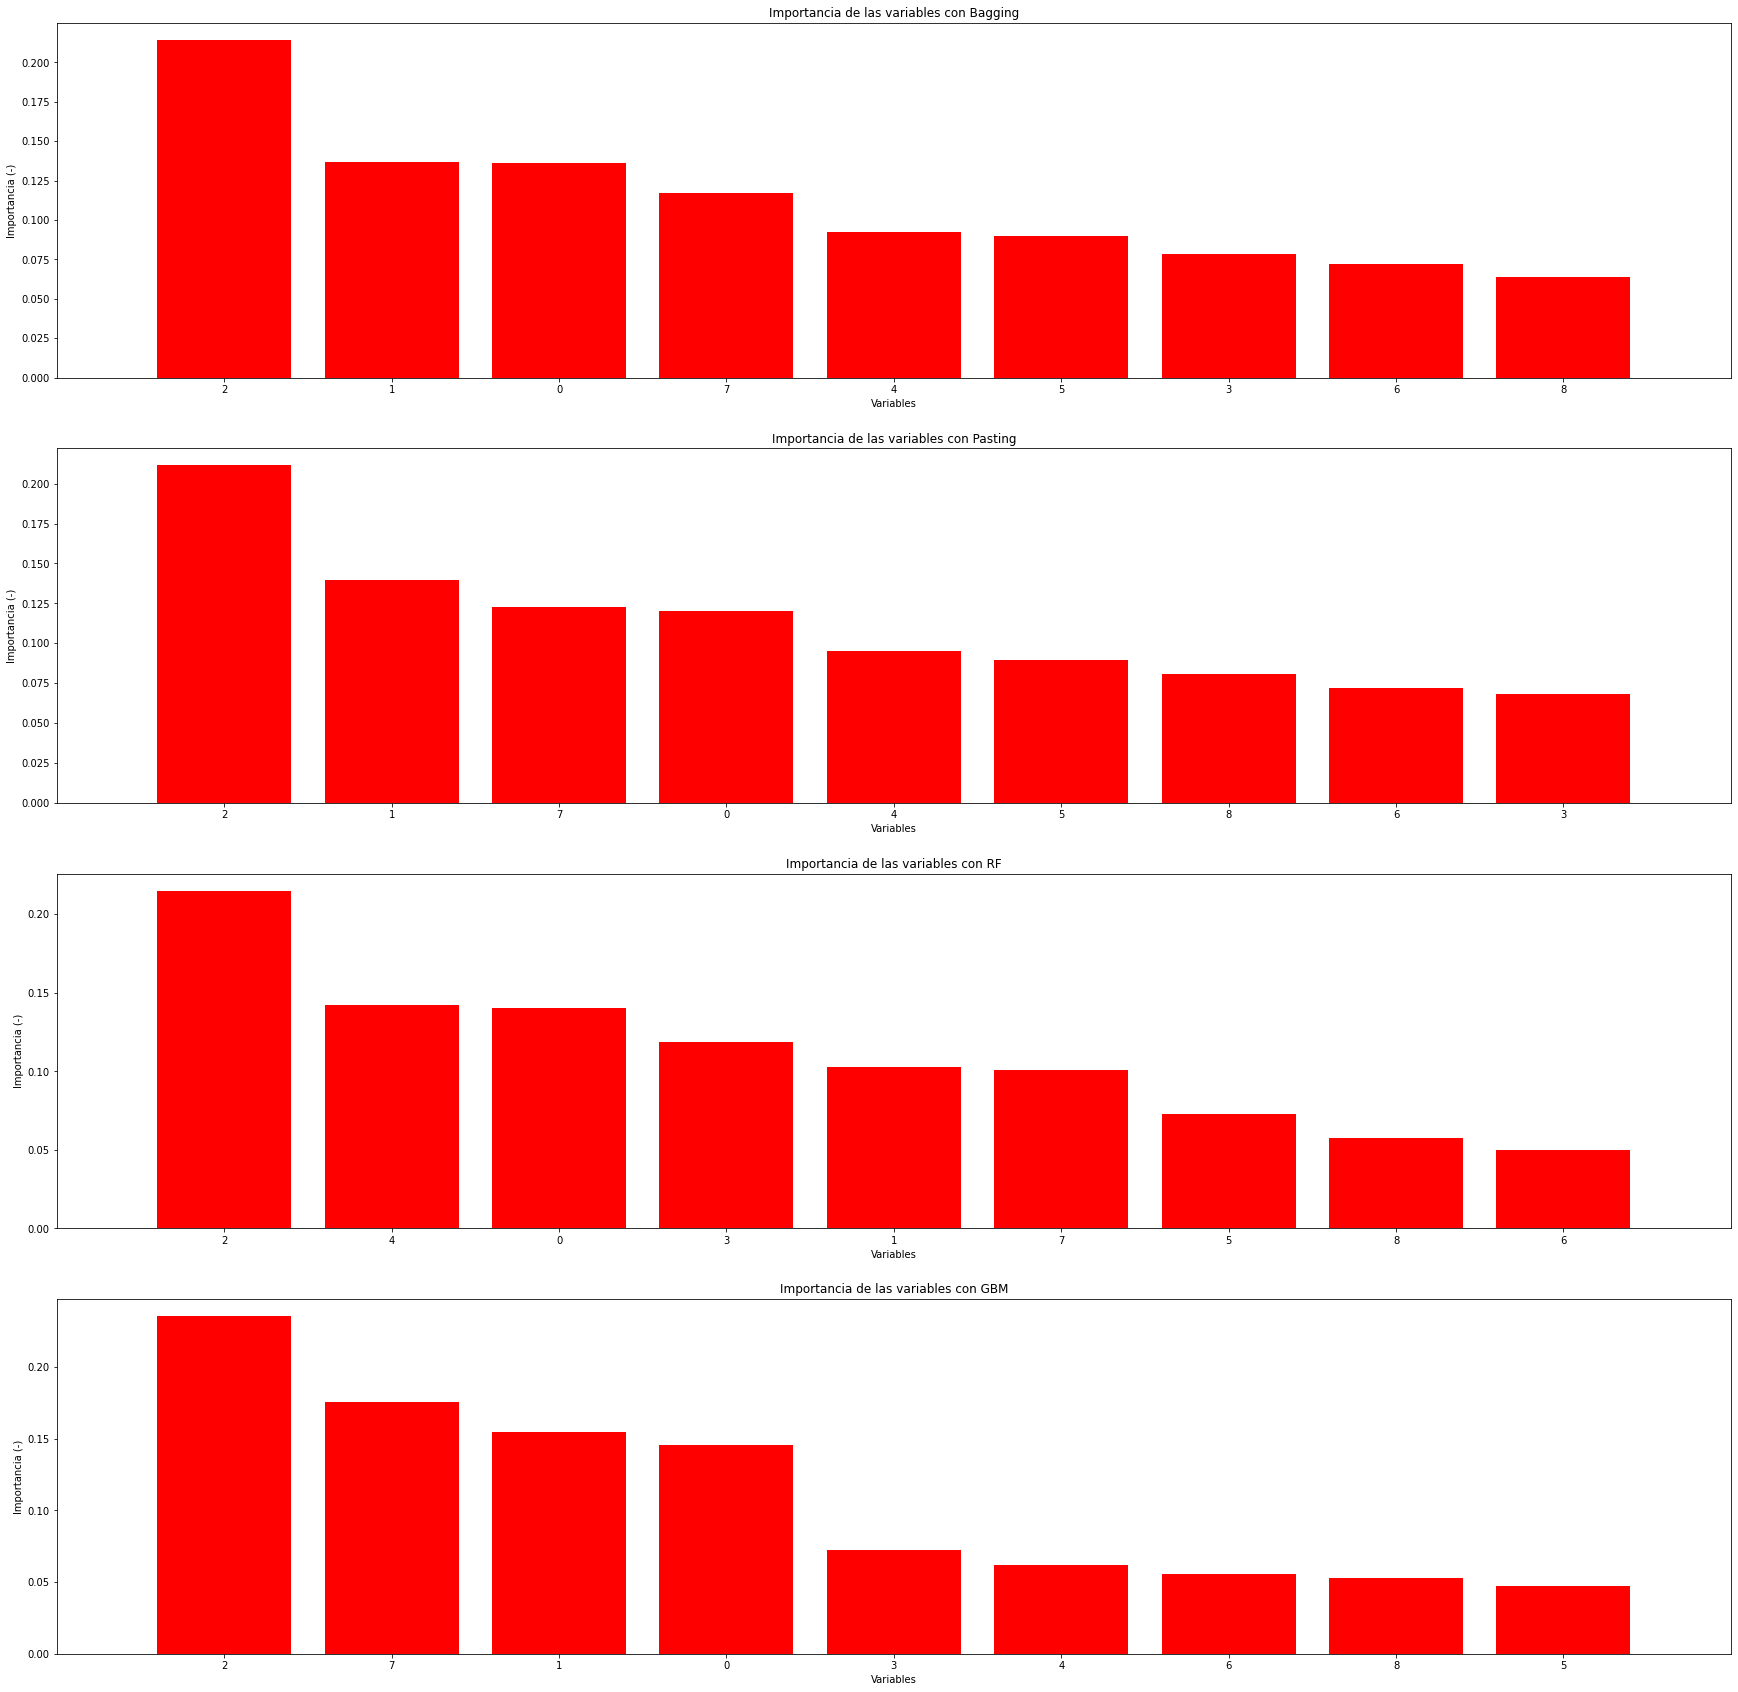

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# importancia1
importancias1 = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
indices1 = np.argsort(importancias1)[::-1]
importancias2 = np.mean([tree.feature_importances_ for tree in pas_clf.estimators_], axis=0)
indices2 = np.argsort(importancias2)[::-1]
importancias3 = rnd_clf.feature_importances_
indices3 = np.argsort(importancias3)[::-1]
importancias4 = gb_clf.feature_importances_
indices4 = np.argsort(importancias4)[::-1]
# dibujar_importancias
plt.figure(figsize = (30, 30))
plt.subplot(4, 1, 1)
plt.title("Importancia de las variables con Bagging")
plt.bar(range(X.shape[1]), importancias1[indices1], color="r", align="center")
## <BarContainer object of 15 artists>
plt.xticks(range(X.shape[1]),indices1)
plt.xlim([-1, X.shape[1]])
## (-1.0, 15.0)
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.subplot(4, 1, 2)
plt.title("Importancia de las variables con Pasting")
plt.bar(range(X.shape[1]), importancias2[indices2], color="r", align="center")
## <BarContainer object of 15 artists>
plt.xticks(range(X.shape[1]), indices2)
plt.xlim([-1, X.shape[1]]) ## (-1.0, 15.0)
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.subplot(4, 1, 3)
plt.title("Importancia de las variables con RF")
plt.bar(range(X.shape[1]), importancias3[indices3], color="r", align="center")
## <BarContainer object of 15 artists>
plt.xticks(range(X.shape[1]),indices3)
plt.xlim([-1, X.shape[1]])
## (-1.0, 15.0)
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.subplot(4, 1, 4)
plt.title("Importancia de las variables con GBM")
plt.bar(range(X.shape[1]), importancias4[indices4], color="r", align="center")
## <BarContainer object of 15 artists>
plt.xticks(range(X.shape[1]),indices4)
plt.xlim([-1, X.shape[1]])
## (-1.0, 15.0)
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.show()